In [ ]:
#Importing the neccessary packages

In [1]:
import numpy as np
import os
import pickle
import warnings

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from skimage.color import rgb2gray
from skimage import io
from skimage.io import imread
from skimage.transform import resize


warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
original_dir = './VOCdevkit/VOC2012/JPEGImages'                     # file path for Image data
segmented_dir = './VOCdevkit/VOC2012/SegmentationClass'             # file path for Segemented class images

In [9]:
with open('./VOCdevkit/VOC2012/ImageSets/Segmentation/trainval.txt', 'r') as f:
    segmented = [line.strip() for line in f.readlines()]    # reading the trainval text file                                             

FileNotFoundError: [Errno 2] No such file or directory: './VOCdevkit/VOC2012/ImageSets/Segmentation/trainval.txt'

# Data Generation and Pre Processing

In [7]:
img = '2010_003529'     #reading the single image and segmented class image of motorbike                  
original_img = imread(os.path.join(original_dir, '{}.jpg'.format(img)))
segment_img = imread(os.path.join(segmented_dir, '{}.png'.format(img)))

FileNotFoundError: No such file: 'C:\Users\Admin\Task 2 Unet Segmentation\VOCdevkit\VOC2012\JPEGImages\2010_003529.jpg'

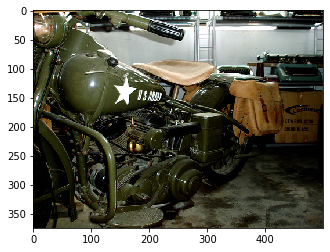

In [265]:
imshow(original_img)

In [266]:
original_img.shape

(375, 500, 3)

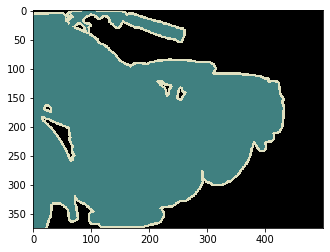

In [267]:
imshow(segment_img)

In [ ]:
# Reading the RGB pixel value to take the segmented area of motorbike

In [268]:
colors = set()
for i in range(segment_img.shape[0]):
    for j in range(segment_img.shape[0]):
        r, g, b,a = segment_img[i, j, :]
        colors.add((r, g, b,a))
print(colors)

{(64, 128, 128, 255), (0, 0, 0, 255), (224, 224, 192, 255)}


In [ ]:
# The pixel value for segmented area is (64,128,128,255)

In [269]:
segment_img.shape

(375, 500, 4)

In [270]:
segment_img.shape

(375, 500, 4)

In [ ]:
#Masking the segmented area consisting of motorbike with 1 and background with 0

In [235]:
mask = np.all(segment_img == (64, 128, 128,255),axis=-1)
output_segment = np.zeros(mask.shape)
output_segment[mask] = 1.

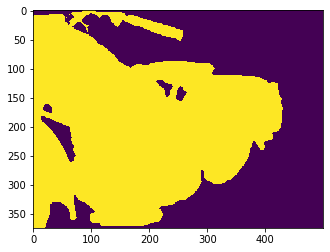

In [236]:
imshow(output_segment) # obtained segmented image with mask

In [237]:
output_segment.shape

(375, 500)

In [ ]:
# calculating the area of segmented region

In [238]:
output_segment.sum() / output_segment.shape[0] / output_segment.shape[1]

0.5601493333333333

In [ ]:
# considering the height and width of images

In [239]:
height = 368
width = 368

In [ ]:
#converting the image to grayscale and resizing to required height 

(368, 368, 1)

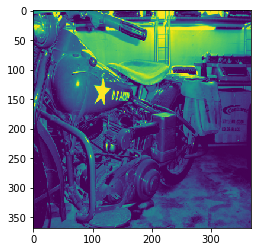

In [201]:
input_img = resize(rgb2gray(original_img), (height, width), anti_aliasing=True).reshape((height, width, 1))
imshow(input_img[:, :, 0])
input_img.shape

In [ ]:
# resizing the output segmented image. We can take 2 classes, one for background and one for required segmented area
# I had considered only segmented area and not considered output background

(368, 368, 1)

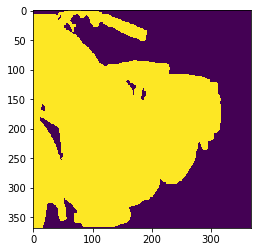

In [242]:
output_segment = resize(output_segment, (height, width), anti_aliasing=True)
output_segment[output_segment > 0.] = 1.
output_back = np.ones(output_segment.shape)
output_back[output_segment > 0.] = 0.
#output = np.stack([output_segment, output_back], axis=-1)
output=np.expand_dims(output_segment,axis=-1)   # expanding the dimnesions of segmented image to get it similar to original image
imshow(output[:,:,0])
output.shape

In [1]:
# Input/output sizes
height = 368
width = 368
# Class we want to detect
segment_color = (64, 128, 128, 255)  # Motorbike
# Percentage of the image covered by this class. Taken as 0.01 to get smaller segmented area under consideration also
threshold = 0.01

In [ ]:
# To read the motorbike images from VOC2012 dataset.
# Taking two empty lists, one for images and another for segmented images

In [244]:
input_images = []
output_tensors = []

In [246]:
for name in segmented:
    original_img = imread(os.path.join(original_dir, '{}.jpg'.format(name)))
    segment_img = imread(os.path.join(segmented_dir, '{}.png'.format(name)))
    mask = np.all(segment_img == segment_color, axis=-1)
    output_segment = np.zeros(mask.shape)
    output_segment[mask] = 1.
    if output_segment.sum() / output_segment.shape[0] / output_segment.shape[1] > threshold:
        image = resize(rgb2gray(original_img), (height, width), anti_aliasing=True).reshape((1, height, width, 1))
        output_segment = resize(output_segment, (height, width), anti_aliasing=True)
        output_segment[output_segment > 0.] = 1.
        output_back = np.ones(output_segment.shape)
        output_back[output_segment > 0.] = 0.
        tensor = np.expand_dims(output_segment,axis=-1).reshape((1, height, width, 1))
        input_images.append(image)
        output_tensors.append(tensor)

In [ ]:
# checking the total motorbike images

In [247]:
print("Images collected: {}".format(len(input_images)))


Images collected: 147


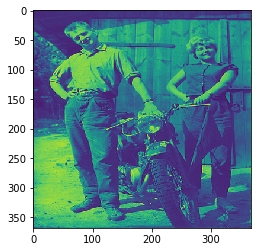

In [251]:
imshow(input_images[67][0, :, :, 0]) # checking if we get correct images

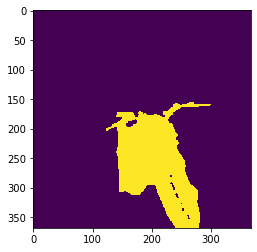

In [253]:
imshow(output_tensors[67][0, :, :, 0])

In [ ]:
# To make images of size(no. of images, height, width,axis), thus concatenating numpy arrays

In [254]:
input_images = np.concatenate(input_images, axis=0)
output_tensors = np.concatenate(output_tensors, axis=0)

In [255]:
print("Input tensor shape: {}".format(input_images.shape))
print("Output tensor shape: {}".format(output_tensors.shape))

Input tensor shape: (147, 368, 368, 1)
Output tensor shape: (147, 368, 368, 1)


In [ ]:
#Serializing the arrays using pickle 

In [256]:
with open('train_images.pkl', 'wb') as fout:
    pickle.dump(input_images, fout, protocol=4)
with open('train_labels.pkl', 'wb') as fout:
    pickle.dump(output_tensors, fout, protocol=4)

In [257]:
print(input_images.shape[1:])
     

(368, 368, 1)


In [258]:
print(output_tensors.shape[-1])

1
